## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1)
X[:20]

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591],
       [0.02540639],
       [0.8271754 ],
       [0.09762559],
       [0.19985712],
       [1.01613261],
       [0.40049508],
       [1.48830834],
       [0.38578401],
       [1.4016895 ],
       [0.58645621],
       [1.54895891],
       [0.01021768],
       [0.22571531],
       [0.22190734],
       [0.49533646]])

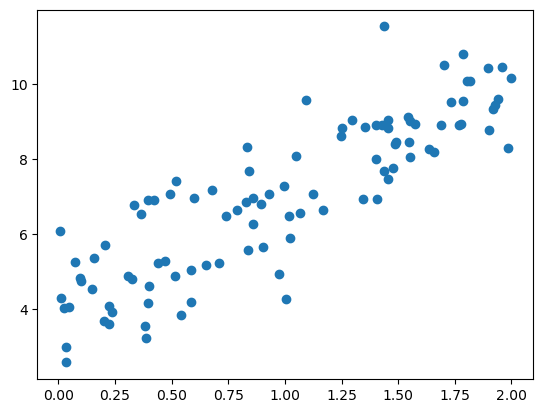

In [4]:
plt.scatter(x, y)

### 使用梯度下降法训练

In [5]:
def J(theta, X_b, y):
    try:
        return  np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [6]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return 2 * res / len(X_b)

In [7]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - gradient * eta
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        cur_iter += 1
        
    return theta

In [8]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01


In [9]:
theta = gradient_descent(X_b, y, initial_theta, eta)
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [10]:
from LinearRegression import LinearRegression

reg = LinearRegression()
reg.fit_gd(X, y)

LinearRegression()

In [12]:
reg.coef_

array([3.00706277])

In [14]:
reg.intercept_

4.021457858204859